In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Ejemplo 1    

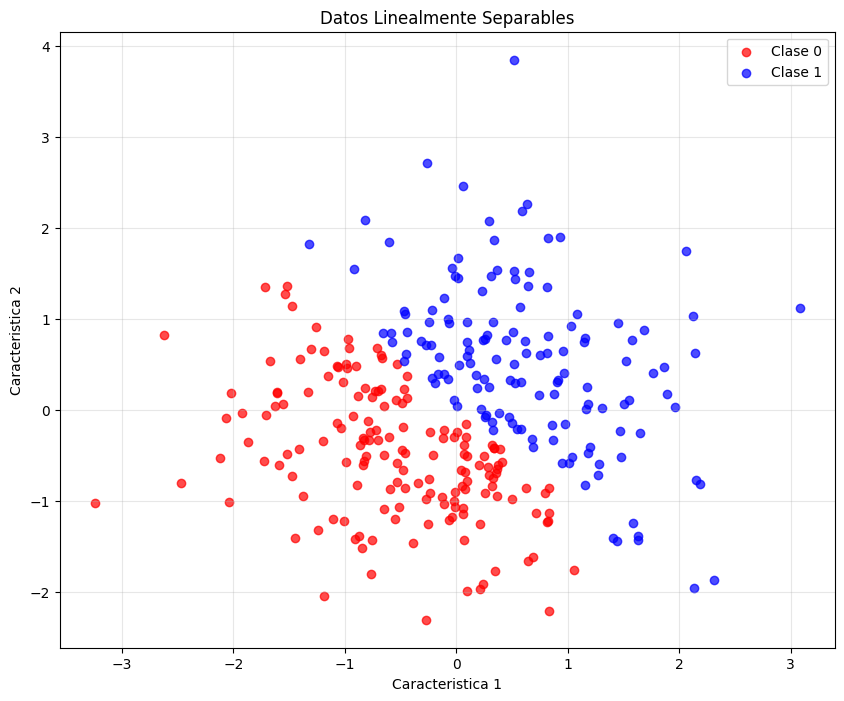

In [4]:
np.random.seed(42)
X = np.random.randn(300, 2)
y = (X[:,0]+X[:,1] > 0).astype(int)

plt.figure(figsize=(10,8))
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.7, label='Clase 0')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.7, label='Clase 1')
plt.xlabel('Caracteristica 1')
plt.ylabel('Caracteristica 2')
plt.title('Datos Linealmente Separables')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [6]:
svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [7]:
y_pred = svm_linear.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precision del modleo: {accuracy:.4f}")
print("\nReporte de clasificacion:")
print(classification_report(y_test, y_pred))


Precision del modleo: 1.0000

Reporte de clasificacion:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        45

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



In [10]:
def plot_decision_boundary(model, X, y):
    h = 0.02
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10,8))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.7, label = 'clase 0')
    plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.7, label = 'clase 1')

    plt.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1], s=100, facecolors='none',
                edgecolors='black', linewidths=1.5,label='Vectores de Soporte')
    
    plt.xlabel('Caracteristica 1')
    plt.ylabel('Caracteristica 2')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    

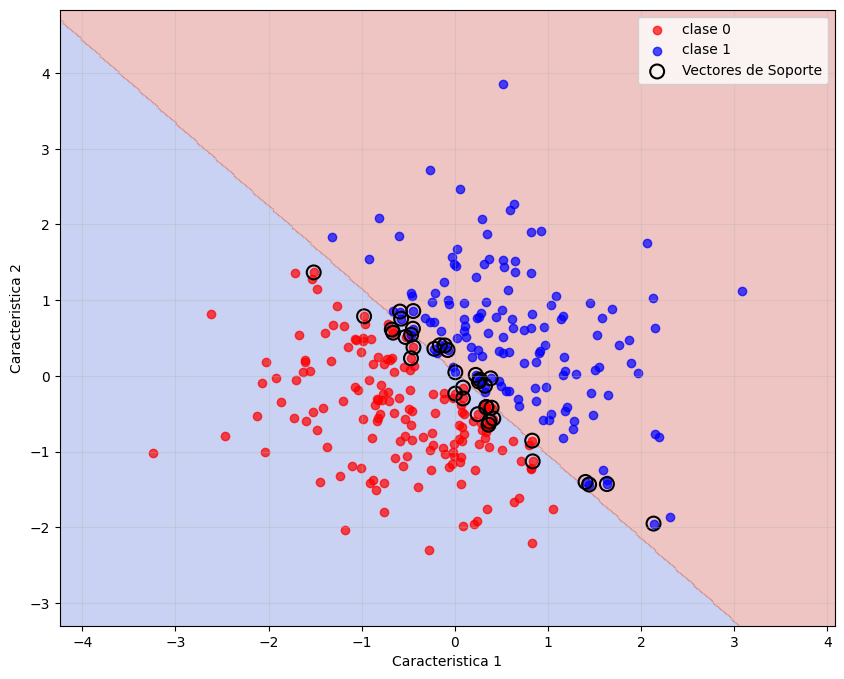

Numero de vectores de soporte: 38
Indices de los vectores de soporte: [  8  31  36  44  87  97 102 121 126 127 131 135 166 167 169 176 186 203
 208  13  18  22  26  71  75  80  96 100 103 110 119 129 151 157 162 171
 180 195]


In [11]:
plot_decision_boundary(svm_linear, X, y)

print(f"Numero de vectores de soporte: {len(svm_linear.support_vectors_)}")
print(f"Indices de los vectores de soporte: {svm_linear.support_}")

## Ejemplo 2

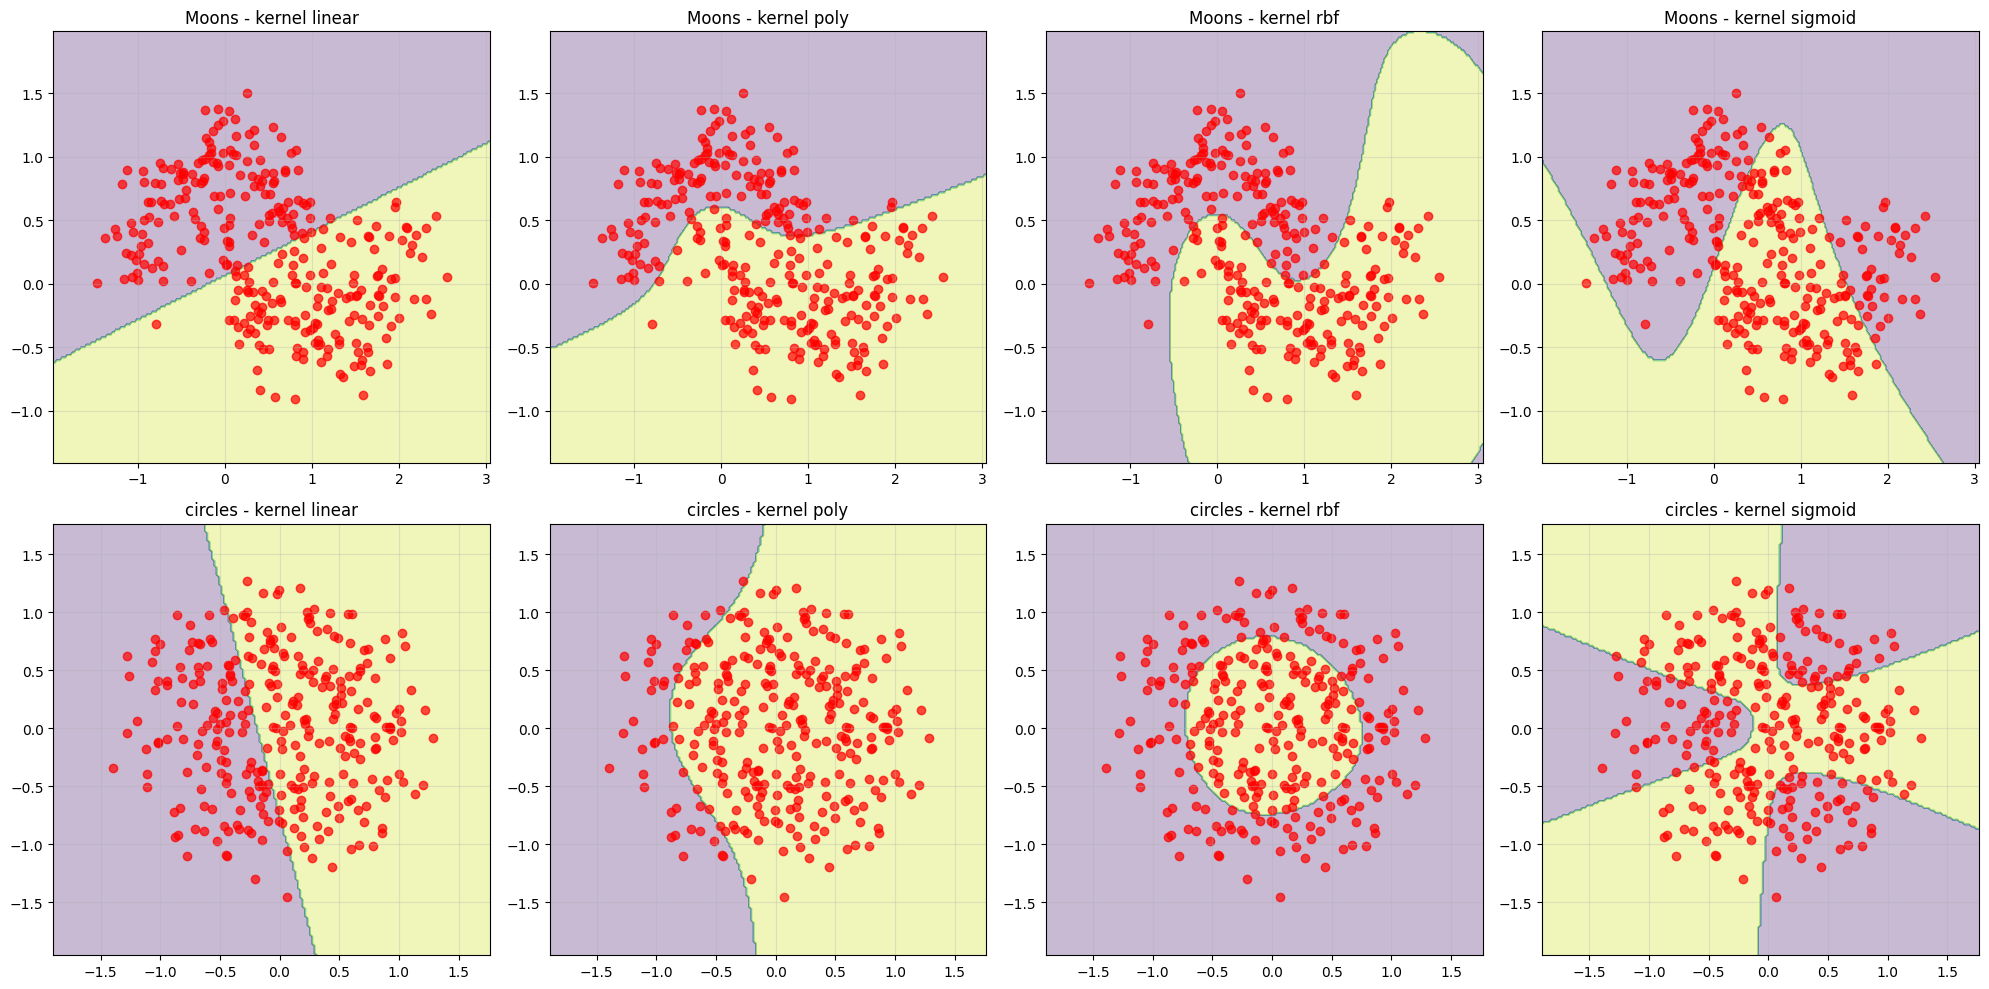

In [15]:
from sklearn.datasets import make_moons, make_circles

x_moons, y_moons = make_moons(n_samples=300, noise=0.2, random_state=42)
x_circles, y_circles = make_circles(n_samples=300, noise=0.2, factor=0.5, random_state=42)

datasets = [
    (x_moons, y_moons, "Moons"),
    (x_circles, y_circles, 'circles')
]

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

fig, axes = plt.subplots(2,4,figsize=(20,10))

for i, (X, y, dataset_name) in enumerate(datasets):
    for j, kernel in enumerate(kernels):
        if kernel == 'poly':
            svm = SVC(kernel=kernel, degree=3,gamma='scale')
        else:
            svm = SVC(kernel=kernel, gamma='scale')
        
        svm.fit(X,y)

        h=0.02
        x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
        y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                            np.arange(y_min, y_max, h))
        
        Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        axes[i, j].contourf(xx,yy,Z,alpha=0.3)
        axes[i, j].scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.7)
        axes[i, j].scatter(X[y==1, 0], X[y==1, 1], color='red', alpha=0.7)
        axes[i, j].set_title(f'{dataset_name} - kernel {kernel}')
        axes[i, j].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()